<a href="https://colab.research.google.com/github/Slusser18/dslusser_MachineLearning/blob/main/Classifying_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
## This is the first assignment
## The goal is to classify movies based on reviews using the IMDB dataset
## The learning objectives are 
  ## 1. Understand what we mean by deep learning
  ## 2. Know the mathematical foundation and structure of neural networks

## We first need to first load the packages
## In python, import is the mode of importing packages
import keras ## keras is a deep learning library within python. Interface for Tensor Flow
## Import the different modules that will be utilized from the keras package
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np ## numpy allows for working with numerical data
import matplotlib.pyplot as plt ## matplotlib is way to generate graphics.  We will utilize this to compare validation loss and accuracy
## Load in the data from keras package
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # This keeps 10,000 most common words in training set

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [30]:
## We need to prepare the data
## We will one-hot encode the data to turn into a sequence of 0's and 1's
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Set specific indices of results[i] to 1s
    return results

## Vectorize for efficiency
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data
y_train = np.asarray(train_labels).astype('float32') # Vectorized labels
y_test = np.asarray(test_labels).astype('float32') # Vectorized labels

In [31]:
## Generate the models that we will be using
## We will also use 3 layers instead of 2
## We will use 32 hidden layers compared to the example using 16
## Instead of using relu like the example, we will use tanh
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid')) # Probability distribution so need a sigmoid activation function

## Set up for our loss function and accuracy
## Use the mean squared error (mse) for the loss function instead of binary_crossentropy
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [32]:
## Validate the approach that was used
## Create a validation set that is of 10,000 sample from original training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Train model on 20 epochs
## 512 mini batch sizes
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1934 - accuracy: 0.6921 - val_loss: 0.0911 - val_accuracy: 0.8845
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0739 - accuracy: 0.9076 - val_loss: 0.0891 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0489 - accuracy: 0.9363 - val_loss: 0.0864 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0358 - accuracy: 0.9566 - val_loss: 0.0938 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0297 - accuracy: 0.9642 - val_loss: 0.1029 - val_accuracy: 0.8711
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0240 - accuracy: 0.9715 - val_loss: 0.1091 - val_accuracy: 0.8660
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0220 - accuracy: 0.9741 - val_loss: 0.1038 - val_accuracy: 0.8756
Epoch 8/20
30

In [33]:
## Now get the history from the model fit
## This allows us to understand what happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
## We want to set up our plots to compare loss
acc = history.history['accuracy'] # Accuracy
val_acc = history.history['val_accuracy'] # Validation accuracy
loss = history.history['loss'] # Loss 
val_loss = history.history['val_loss'] # Validation loss

epochs = range(1, len(acc) + 1)

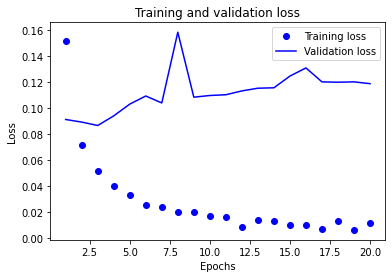

In [35]:
## Plot the loss function
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

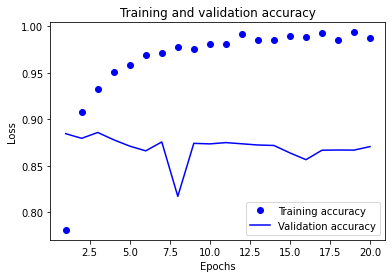

In [41]:
## We now want to look at the accuracy of the model
## Clear the figure first
plt.clf()

## Define the values
acc_values = history_dict['accuracy'] # accuracy values
val_acc_values = history_dict['val_accuracy'] # Validation accuracy value

## Plot the accuracy data
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The training loss decreases with every epoch and the mean-squared error is decreasing with every epoch (thus the error is being reduced and the model is more accurate on the training data with each epoch).  However, weh looking at the validation loss and validation accuracy, the ideal number is three epochs.  When using the relu activation function on 2 layers, 16 units and the tanh activation function, the ideal number of epochs was four.

In [25]:
## Train the data on three epochs
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

## Get the results
results

Epoch 1/3
49/49 [==============================] - 2s 35ms/step - loss: 0.1696 - accuracy: 0.7432
Epoch 2/3
49/49 [==============================] - 2s 36ms/step - loss: 0.0684 - accuracy: 0.9100
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0910 - accuracy: 0.8795


[0.09100087732076645, 0.8794800043106079]

This appraoch is 87.9 percent accurate, which is about the same as the approach from the example (88.5 percent) but is not quite as good as an approach.  Thus, let's now examine with 64 hidden units and 1 layer

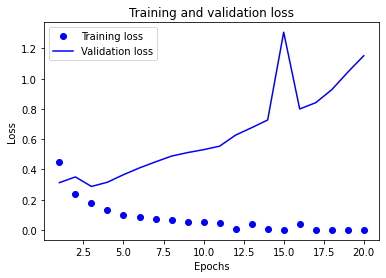

In [26]:
## Use one layer and 64 hidden units
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

## Plot the loss function
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

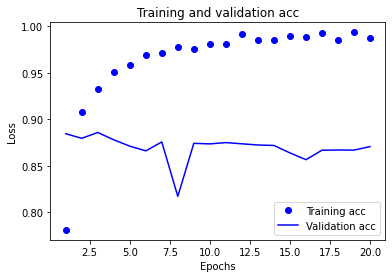

In [42]:
## We now want to look at the accuracy of the model
## Clear the figure first
plt.clf()

## Define the values
acc_values = history_dict['accuracy'] # Accuracy values
val_acc_values = history_dict['val_accuracy'] # Validation Accuracy value

## Plot the accuracy data
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

## Get the results
results

Epoch 1/3
49/49 [==============================] - 3s 47ms/step - loss: 0.1821 - accuracy: 0.7381
Epoch 2/3
49/49 [==============================] - 2s 48ms/step - loss: 0.0695 - accuracy: 0.9180
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.0863 - accuracy: 0.8836


[0.08633718639612198, 0.8836399912834167]

This improved the accuracy of the model to an accuracy of 88.4 percent and is almost identical to the example. However, we could better improve performance on the validation, and thus obtaining a better model overall.  We will use regularization on the data.

In [50]:
## Load in the data from keras package
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # This keeps 10,000 most common words in training set
## We need to prepare the data
## We will one-hot encode the data to turn into a sequence of 0's and 1's
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Set specific indices of results[i] to 1s
    return results

## Vectorize for efficiency
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data
y_train = np.asarray(train_labels).astype('float32') # Vectorized labels
y_test = np.asarray(test_labels).astype('float32') # Vectorized labels

## Generate the models that we will be using
## We will also use 3 layers instead of 2
## We will use 32 hidden layers compared to the example using 16
## Instead of using relu like the example, we will use tanh
model = keras.Sequential([
  layers.Dense(16, activation = 'tanh'),
  layers.Dropout(0.5), # Dropout function
  layers.Dense(1, activation='sigmoid')
  ])

## Set up for our loss function and accuracy
## Use the mean squared error (mse) for the loss function instead of binary_crossentropy
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

## Validate the approach that was used
## Create a validation set that is of 10,000 sample from original training
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Train model on 20 epochs
## 512 mini batch sizes
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.2001 - accuracy: 0.7098 - val_loss: 0.1267 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1132 - accuracy: 0.8896 - val_loss: 0.1016 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0856 - accuracy: 0.9167 - val_loss: 0.0914 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0688 - accuracy: 0.9354 - val_loss: 0.0856 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0593 - accuracy: 0.9405 - val_loss: 0.0825 - val_accuracy: 0.8942
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0509 - accuracy: 0.9508 - val_loss: 0.0809 - val_accuracy: 0.8926
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0435 - accuracy: 0.9573 - val_loss: 0.0813 - val_accuracy: 0.8886
Epoch 8/20
30

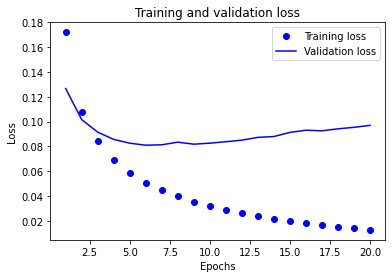

In [52]:
## We want to set up our plots to compare loss
acc = history.history['accuracy'] # Accuracy
val_acc = history.history['val_accuracy'] # Validation accuracy
loss = history.history['loss'] # Loss 
val_loss = history.history['val_loss'] # Validation loss

epochs = range(1, len(acc) + 1)

## Plot the loss function
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

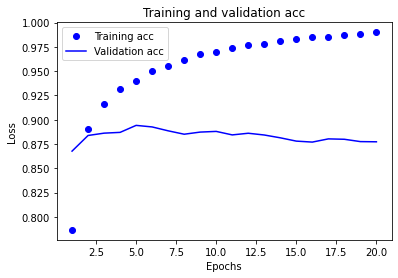

In [56]:
## We now want to look at the accuracy of the model
## Clear the figure first
plt.clf()

## Define the values
acc_values = history_dict['accuracy'] # Accuracy values
val_acc_values = history_dict['val_accuracy'] # Validation Accuracy value

## Plot the accuracy data
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The loss is minimized around 6 epochs and accuracy maximized around 6 epochs.  So now run the model on 6 epochs.  The accuracy has been improved with the dropout.  With the dropout, accuracy in validation is 89.42 percent compared to 88.58 percent without this.



In [57]:
## See how model performs with 6 epochs
model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

## Get the results
results

Epoch 1/6
49/49 [==============================] - 1s 28ms/step - loss: 0.0458 - accuracy: 0.9453
Epoch 2/6
49/49 [==============================] - 1s 28ms/step - loss: 0.0396 - accuracy: 0.9544
Epoch 3/6
49/49 [==============================] - 1s 29ms/step - loss: 0.0353 - accuracy: 0.9598
Epoch 4/6
49/49 [==============================] - 1s 29ms/step - loss: 0.0321 - accuracy: 0.9644
Epoch 5/6
49/49 [==============================] - 1s 28ms/step - loss: 0.0296 - accuracy: 0.9677
Epoch 6/6
782/782 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.8666


[0.10733341425657272, 0.8665599822998047]

The overall accuracy of this model decreases to 86.66 percent, which is the worst when comparing the example, 32 hidden units on 3 layers and 64 hidden units on one layer.

In [58]:
## Predict the results
model.predict(x_test)


array([[0.00834277],
       [0.9999962 ],
       [0.60460377],
       ...,
       [0.08699313],
       [0.01290932],
       [0.4216945 ]], dtype=float32)

The model has confidence in predicting some of the outputs but not all of the movies.